In [ ]:
  import requests
  from bs4 import BeautifulSoup #importing the libraries needed
  import time
  import json
  import re
  from google.colab import files

#Scraping


In [ ]:
  def scrape_poem(url): #scraping the poem by prompting the poem url
    response=requests.get(url)
    poem_lines=[]
    var={"poem":[]}
    if response.status_code==200:
      soup=BeautifulSoup(response.content,'lxml')
      poem=soup.find('div',class_="field field--body")
      if not poem:
        return var
      pom=poem.find_all('p')
      for po in pom:
        ex=po.find_all('span',class_="long-line")
        if(ex):
          for line in ex:
            poem_lines.append(line.text.strip())
          poem_lines.append("")
          var["poem"] = "\n".join(poem_lines).rstrip('\n')
    import html

# After scraping the poem content
    var["poem"] = html.unescape(var["poem"])
    return var

In [ ]:
  def scrape_poems(url,list): #generating poem url from the poem list url
      response = requests.get(url)
      if response.status_code == 200: # means the request for html text was succesful
          soup = BeautifulSoup(response.content, 'lxml')
          poems = []
          rows = soup.find_all('tr') #headers for each poem
          if not rows:
              print("No articles found with the specified class.")
              return -1
          for row in rows:
              title_cell = row.find('td', class_="views-field views-field-title") # finding headers for title
              if title_cell:
                #text from the title cell basically includes the title
                  poem_url = "https://poets.org" + title_cell.a['href']
                  var=scrape_poem(poem_url) #for scraping the poem
                  if(var["poem"]): #href was used for storing url of the poem
                   list.append(var) #for adding all the scraped poems into a list

              # Uncomment the line below during debugging if needed
              # time.sleep(1)
      else:
          print(f"Failed to retrieve page: {response.status_code}")


In [ ]:
  list=[]
  for i in range(0,5) : #iterate through 5 webpages (for eg); originally took 200 webpages
   scrape_poems(f'https://poets.org/poems?page={i}',list)
  print(list) #printing the scarped poems

[{'poem': 'The line-storm clouds fly tattered and swift,\nThe road is forlorn all day,\nWhere a myriad snowy quartz stones lift,\nAnd the hoof-prints vanish away.\nThe roadside flowers, too wet for the bee,\nExpend their bloom in vain.\nCome over the hills and far with me,\nAnd be my love in the rain.\n\nThe birds have less to say for themselves\nIn the wood-world’s torn despair\nThan now these numberless years the elves,\nAlthough they are no less there:\nAll song of the woods is crushed like some\nWild, easily shattered rose.\nCome, be my love in the wet woods; come,\nWhere the boughs rain when it blows.\n\nThere is the gale to urge behind\nAnd bruit our singing down,\nAnd the shallow waters aflutter with wind\nFrom which to gather your gown.\nWhat matter if we go clear to the west,\nAnd come not through dry-shod?\nFor wilding brooch shall wet your breast\nThe rain-fresh goldenrod.\n\nOh, never this whelming east wind swells\nBut it seems like the sea’s return\nTo the ancient lands w

# Cleansing

In [ ]:
def clean_dataset(list): #for cleansing the dataset
    for entry in list:
      poem = entry.get("poem", "").strip()
      # Normalize excessive newlines (keep two for paragraph breaks)
      poem = re.sub(r'\n\n+', '\n\n', poem)  # Replace 3+ newlines with 2

    # Replace common special characters
      poem = poem.replace('’', "'").replace('“', '"').replace('”', '"').replace('—', '-')

    # Remove unwanted symbols (e.g., emojis, rare characters)
      poem = re.sub(r'[^\w\s.,!?\'\"-]','',poem)

      entry["poem"] = poem
    return list

In [ ]:
list = clean_dataset(list)
print(list)

[{'poem': "The line-storm clouds fly tattered and swift,\nThe road is forlorn all day,\nWhere a myriad snowy quartz stones lift,\nAnd the hoof-prints vanish away.\nThe roadside flowers, too wet for the bee,\nExpend their bloom in vain.\nCome over the hills and far with me,\nAnd be my love in the rain.\n\nThe birds have less to say for themselves\nIn the wood-world's torn despair\nThan now these numberless years the elves,\nAlthough they are no less there\nAll song of the woods is crushed like some\nWild, easily shattered rose.\nCome, be my love in the wet woods come,\nWhere the boughs rain when it blows.\n\nThere is the gale to urge behind\nAnd bruit our singing down,\nAnd the shallow waters aflutter with wind\nFrom which to gather your gown.\nWhat matter if we go clear to the west,\nAnd come not through dry-shod?\nFor wilding brooch shall wet your breast\nThe rain-fresh goldenrod.\n\nOh, never this whelming east wind swells\nBut it seems like the sea's return\nTo the ancient lands whe

In [ ]:
  with open("outfile.json", "w", encoding="utf-8") as f:
      json.dump(list, f,ensure_ascii=False, indent=4)
  files.download('outfile.json')  # Downloads the JSON file to your system

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Tokenisation

In [ ]:
import json
import re
with open('/content/outfile.json', 'r') as f:
  poems = json.load(f)
print(len(poems))


short_poems = []
for entry in poems:
  poem = entry.get("poem", "").strip()
  #print(poem)
  if len(poem.split()) < 700:
    short_poems.append(entry)
    print(poem.split())


with open("Poems_dataset.json", "w", encoding="utf-8") as f:
  json.dump(short_poems, f,ensure_ascii=False, indent=4)
  files.download('Poems_dataset.json')

80
['The', 'line-storm', 'clouds', 'fly', 'tattered', 'and', 'swift,', 'The', 'road', 'is', 'forlorn', 'all', 'day,', 'Where', 'a', 'myriad', 'snowy', 'quartz', 'stones', 'lift,', 'And', 'the', 'hoof-prints', 'vanish', 'away.', 'The', 'roadside', 'flowers,', 'too', 'wet', 'for', 'the', 'bee,', 'Expend', 'their', 'bloom', 'in', 'vain.', 'Come', 'over', 'the', 'hills', 'and', 'far', 'with', 'me,', 'And', 'be', 'my', 'love', 'in', 'the', 'rain.', 'The', 'birds', 'have', 'less', 'to', 'say', 'for', 'themselves', 'In', 'the', "wood-world's", 'torn', 'despair', 'Than', 'now', 'these', 'numberless', 'years', 'the', 'elves,', 'Although', 'they', 'are', 'no', 'less', 'there', 'All', 'song', 'of', 'the', 'woods', 'is', 'crushed', 'like', 'some', 'Wild,', 'easily', 'shattered', 'rose.', 'Come,', 'be', 'my', 'love', 'in', 'the', 'wet', 'woods', 'come,', 'Where', 'the', 'boughs', 'rain', 'when', 'it', 'blows.', 'There', 'is', 'the', 'gale', 'to', 'urge', 'behind', 'And', 'bruit', 'our', 'singing', 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Data Loading

In [ ]:
import torch
from torch.utils.data import Dataset, random_split, DataLoader, RandomSampler, SequentialSampler

In [ ]:
from transformers import GPT2Tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2',
                                          bos_token='<BOS>',
                                          eos_token='<EOS>',
                                          pad_token='<PAD>')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

In [ ]:
import json
with open('/content/outfile.json', 'r') as f:
  data = json.load(f)
class PoemDataset(Dataset):
  def __init__(self, poems, tokenizer, max_length=768, gpt2_type="gpt2"):
    self.tokenizer = tokenizer
    self.input_ids = []
    self.attn_masks = []

    for poem in poems:

      encodings_dict = tokenizer("<BOS>"+poem["poem"]+"<EOS>",
                                 truncation=True,
                                 max_length=max_length,
                                 padding="max_length")

      self.input_ids.append(torch.tensor(encodings_dict["input_ids"]))
      self.attn_masks.append(torch.tensor(encodings_dict["attention_mask"]))

  def __len__(self):
    return len(self.input_ids)

  def __getitem__(self, idx):
    return self.input_ids[idx], self.attn_masks[idx]

In [ ]:
max_length = 400
batch_size = 16
dataset = PoemDataset(data, tokenizer, max_length=max_length)

# Splitting data into train and validation sets
train_size = int(0.9*len(dataset))
val_size = len(dataset) - train_size

train_dataset, val_dataset = random_split(dataset, [train_size, val_size])
print("Number of samples for training =", train_size)
print("Number of samples for validation =", val_size)

Number of samples for training = 72
Number of samples for validation = 8


In [ ]:
train_dataloader = DataLoader(train_dataset,
                              sampler=RandomSampler(train_dataset),
                              batch_size=batch_size)

val_dataloader = DataLoader(val_dataset,
                            sampler=SequentialSampler(val_dataset),
                            batch_size=batch_size)

In [ ]:
idx = 2  # Index for the 3rd poem

input_ids, attention_mask = dataset[idx]

#using input_ids and attention_mask as needed
print("Input IDs:", input_ids)
print("Attention Mask:", attention_mask)

decoded_poem = tokenizer.decode(input_ids, skip_special_tokens=True)

print("Decoded Poem:", decoded_poem)

Input IDs: tensor([50257,   818,   262, 11544,  2156,   314,   716,  6600, 12607,    13,
          198,  1639,  1833,   612,   318,   645,  2156,    11,   612,   318,
          645, 12607,    11,   198, 25907,   994,   314,   716,    13,   198,
          198,   464, 24556,   543,   373, 24178, 15881,   274,  1028,   198,
         1169,  9396,   543,   373, 24178,   635,    13,   198,  2949,   530,
         2073,   318,  1088,    13,   198,   198,  8496,   423,   484,  3750,
          284,    11,  3956,   290,  6621,    11,   198, 13552,   290,  2988,
           30,  3242,  1863,   262, 15191,    11,   198, 28998,    13,  5334,
         8242,   389,   991,   319,   262,   289,  6606,    11,   198,   198,
        24571, 16759, 33654, 13970,   262, 14595,    11,   198,  4758,   318,
        13970,   262,  4898,   301,   659,   198,  4480,   663, 48612,   290,
          523,   313,    88, 40231,    11,   198,   198, 16833,  3703,  1598,
           11,   198, 43701,  6508,   290,   374,  39

In [ ]:
print(len(train_dataloader)) # prints the number of batches for training

5


# Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
df = pd.DataFrame(data)
print(df)

                                                 poem
0   The line-storm clouds fly tattered and swift,\...
1   Droning a drowsy syncopated tune,\nRocking bac...
2   In the burned house I am eating breakfast.\nYo...
3   Batter my heart, three-personed God, for you\n...
4   The instructor said,\n\nGo home and write\na p...
..                                                ...
75  Whenever I spend the day crying,\nmy friends t...
76  I think that I shall never see\nA poem lovely ...
77  A Rock, A River, A Tree\nHosts to species long...
78  Life is short, though I keep this from my chil...
79  Sometimes when you start to ramble\nor rather ...

[80 rows x 1 columns]


In [ ]:
print("\nSummary of poem lengths:")
df['poem_length'] = df['poem'].apply(lambda x: len(x.split()))
print(df['poem_length'].describe())


Summary of poem lengths:
count      80.000000
mean      297.325000
std       497.682014
min        14.000000
25%       102.500000
50%       171.500000
75%       282.500000
max      4074.000000
Name: poem_length, dtype: float64


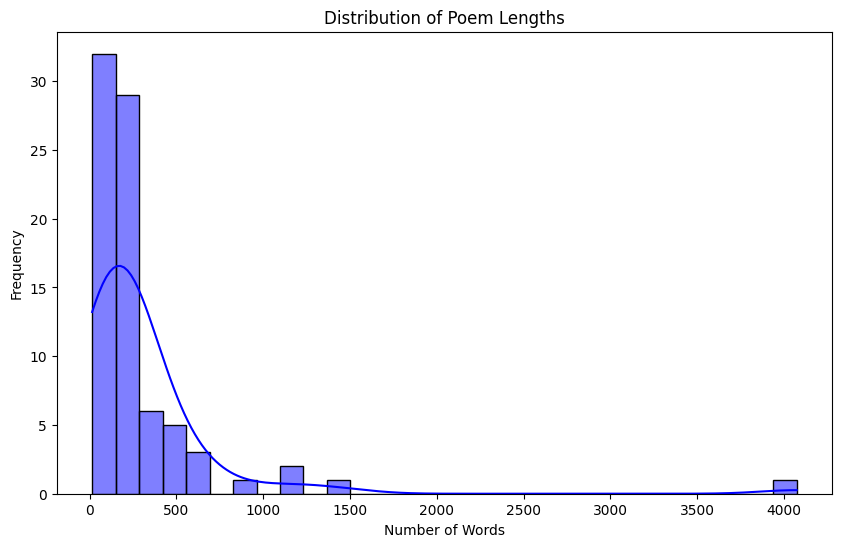

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['poem_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Poem Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import spacy

# Load spaCy's English model
nlp = spacy.load("en_core_web_sm")

# Tokenize text
doc = nlp(all_text.lower())
filtered_words = [token.text for token in doc if token.is_alpha and token.text not in stop_words]

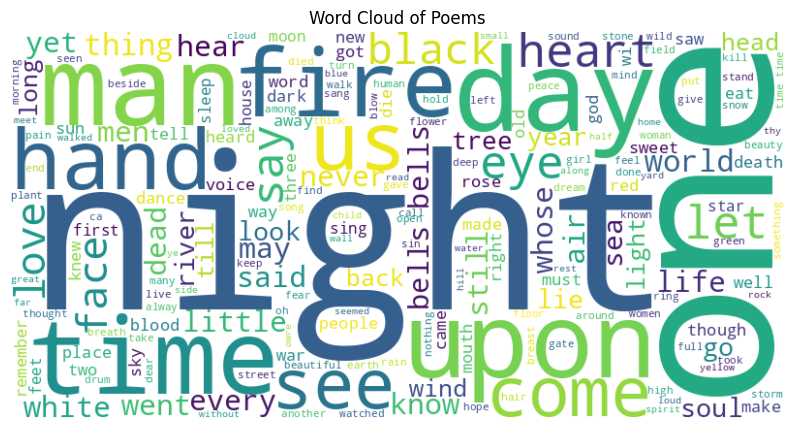

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Poems')
plt.show()

In [ ]:
# Most common words
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)

<ipython-input-81-08d229507818>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='viridis')


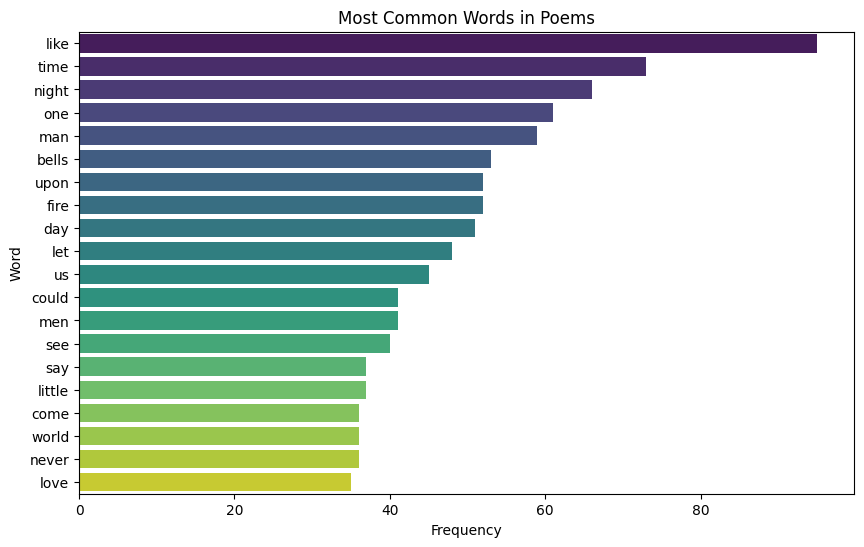

In [ ]:
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='viridis')
plt.title('Most Common Words in Poems')
plt.show()

In [ ]:
print("\nEDA for the poem dataset completed successfully.")


EDA for the poem dataset completed successfully.
